## Gamze Keçibaş
    Fall 2021 - COMP541: Deep Learning Class
    Self Assesment Task
---
### Content
- **Step 01:** Import using libraries  
- **Step 02:** Read and label training data from directory  
- **Step 03:** Read and label test data from directory  
- **Step 04:** Check importing training data  
- **Step 05:** Count frequency of unique words  
- **Step 06:** Sort the unique words to determine threshold values  
- **Step 07:** Define max and min thresholds to initialize & useful functions to make predictions and calculate accuracy  
- **Step 08:** Optimize the accuracy with different thresholds  
- **Step 09:** Plotting  

In [80]:
# Step 01. Import using libraries
import os
import string
import numpy as np

In [11]:
# Step 02. Read and label training data with their directories
file_dir= r'C:\Users\gkeciba1\Downloads\aclImdb'
train_dir= os.path.join(file_dir, 'train')

labels=[]
texts=[]

for label_type in ['neg','pos']:
    dir_name= os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f= open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read().lower().translate(str.maketrans('', '',string.punctuation)))
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [71]:
# Step 03. Read and label test data with their directories 
test_dir= os.path.join(file_dir, 'test')

test_labels=[]
test_texts=[]

for label_type in ['neg','pos']:
    dir_name= os.path.join(test_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f= open(os.path.join(dir_name, fname), encoding='utf-8')
            test_texts.append(f.read().lower().translate(str.maketrans('', '',string.punctuation)))
            f.close()
            if label_type == 'neg':
                test_labels.append(0)
            else:
                test_labels.append(1)

In [40]:
#Step 04. Check importing train data
print(texts[0])
print(labels[:5])
print(labels[-5:])

story of a man who has unnatural feelings for a pig starts out with a opening scene that is a terrific example of absurd comedy a formal orchestra audience is turned into an insane violent mob by the crazy chantings of its singers unfortunately it stays absurd the whole time with no general narrative eventually making it just too off putting even those from the era should be turned off the cryptic dialogue would make shakespeare seem easy to a third grader on a technical level its better than you might think with some good cinematography by future great vilmos zsigmond future stars sally kirkland and frederic forrest can be seen briefly
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]


In [41]:
#Step 05. Count frequency of unique words
pos_dict = dict()
neg_dict = dict()

for idx, sent in enumerate(texts):
    words= sent.split()
    if labels[idx] == 0:
        d= neg_dict
    else:
        d= pos_dict
    for w in words:
        if w not in d:
            d[w] = 1
        else:
            d[w] += 1

In [53]:
# Step 06.1. Sort using words in positive reviews with ascending order
dict(sorted(pos_dict.items(), key= lambda item: item[1]))

{'houselessness': 1,
 'exdancer': 1,
 'fumes': 1,
 'shrugs': 1,
 'indifferently': 1,
 'fume': 1,
 'quirkyinsane': 1,
 'keeperbr': 1,
 '7710': 1,
 'unexpectedness': 1,
 'dispersion': 1,
 'suspensefulbr': 1,
 '12106': 1,
 'suspenser': 1,
 'derange': 1,
 'talkradio': 1,
 'anticipatebr': 1,
 'hoodwink': 1,
 'smoochy': 1,
 'godby': 1,
 'maupins': 1,
 'lifejess': 1,
 'himdonnabr': 1,
 'forwardbr': 1,
 'pyschosis': 1,
 'listner': 1,
 'enwrapped': 1,
 'onerobin': 1,
 'williamsscraggy': 1,
 'hushedhypnotic': 1,
 'logandrory': 1,
 'culkinwho': 1,
 'bootpete': 1,
 'stillsince': 1,
 'jessbobby': 1,
 'cannavalegoodhappens': 1,
 'acquaints': 1,
 'guardiana': 1,
 'donnatoni': 1,
 'collettebrilliantand': 1,
 'wisconsinhe': 1,
 'wasnaturallynot': 1,
 'maupinwho': 1,
 'stetnerthis': 1,
 'faster90': 1,
 'minmaybe': 1,
 'longerthan': 1,
 'sewup': 1,
 'thatif': 1,
 'mrmaupins': 1,
 'storyyou': 1,
 'stillthe': 1,
 'narrationpersonallycollettecannavaleculkin': 1,
 'colletes': 1,
 'hasare': 1,
 'herenamelythe

In [54]:
# Step 06.2. Sort using words in positive reviews with descending order
dict(sorted(pos_dict.items(), key= lambda item: item[1],reverse=True))

{'the': 172264,
 'and': 88785,
 'a': 83135,
 'of': 76586,
 'to': 66391,
 'is': 57026,
 'in': 49708,
 'it': 38435,
 'i': 35574,
 'this': 34739,
 'that': 34052,
 'br': 27534,
 'as': 26157,
 'with': 23139,
 'for': 22273,
 'was': 21833,
 'but': 20414,
 'film': 19592,
 'movie': 18140,
 'his': 17152,
 'on': 16646,
 'are': 14758,
 'he': 14616,
 'you': 14538,
 'not': 14114,
 'one': 13069,
 'its': 13000,
 'have': 12556,
 'be': 12263,
 'by': 11920,
 'all': 11534,
 'an': 11258,
 'at': 11173,
 'who': 10882,
 'from': 10714,
 'her': 10317,
 'has': 9144,
 'they': 9132,
 'so': 8883,
 'like': 8729,
 'very': 8268,
 'about': 8249,
 'out': 7742,
 'or': 7557,
 'more': 7432,
 'when': 7409,
 'some': 7402,
 'good': 7396,
 'what': 7373,
 'if': 7185,
 'just': 7096,
 'she': 6926,
 'there': 6679,
 'story': 6485,
 'my': 6455,
 'great': 6293,
 'which': 6176,
 'their': 6095,
 'time': 5999,
 'see': 5845,
 'up': 5787,
 'well': 5568,
 'can': 5528,
 'also': 5506,
 'really': 5450,
 'would': 5289,
 'will': 5184,
 'had': 5

In [55]:
# Step 06.3. Sort using words in negative reviews with ascending order
dict(sorted(neg_dict.items(), key= lambda item: item[1]))

{'chantings': 1,
 'vips': 1,
 'quinlan': 1,
 'jetliner': 1,
 'copilot': 1,
 'tile': 1,
 'suffocate': 1,
 'jinxed': 1,
 'miscalculated': 1,
 'culinary': 1,
 'princessbr': 1,
 'loooonnnnng': 1,
 'nonlove': 1,
 'halitosis': 1,
 'affluence': 1,
 'contemporaneous': 1,
 'excoriated': 1,
 'suspensehorror': 1,
 'sontags': 1,
 'solemnly': 1,
 'intoned': 1,
 'intonations': 1,
 'celebritybr': 1,
 'visualaural': 1,
 '70yearold': 1,
 'anticomedy': 1,
 'decrescendos': 1,
 'humidity': 1,
 'moritz': 1,
 'bleibtreau': 1,
 'tact': 1,
 'ufortunately': 1,
 'hazydark': 1,
 'neverthelessbr': 1,
 'overexciting': 1,
 'wivesbr': 1,
 'movieboy': 1,
 'hotrodding': 1,
 'spotless': 1,
 'dragracingthis': 1,
 'necking': 1,
 'airdad': 1,
 'prescooby': 1,
 'doostyled': 1,
 'hmmmmmmmmbr': 1,
 'kumarbr': 1,
 'kapoorbr': 1,
 'saifbr': 1,
 'bannerbr': 1,
 'jbjbr': 1,
 'snatchbr': 1,
 'sidey': 1,
 'khiladi': 1,
 'kareenasaif': 1,
 'hmmmmmmmbr': 1,
 'sidekickbr': 1,
 'confusionneed': 1,
 'lugacy': 1,
 'filmtvliteraturelife'

In [57]:
# Step 06.4. Sort using words in negative reviews with descending order
dict(sorted(neg_dict.items(), key= lambda item: item[1],reverse=True))

{'the': 162427,
 'a': 78805,
 'and': 73443,
 'of': 68740,
 'to': 68651,
 'is': 49829,
 'in': 43320,
 'this': 40451,
 'i': 40145,
 'it': 38664,
 'that': 35300,
 'br': 29609,
 'was': 26175,
 'movie': 23667,
 'for': 21691,
 'but': 21325,
 'with': 20732,
 'as': 20505,
 'film': 17863,
 'on': 16859,
 'not': 16076,
 'have': 15111,
 'you': 14959,
 'are': 14566,
 'be': 14368,
 'one': 12439,
 'at': 12186,
 'his': 12097,
 'its': 12054,
 'he': 12031,
 'they': 11826,
 'all': 11622,
 'so': 11007,
 'like': 10912,
 'just': 10533,
 'by': 10445,
 'an': 10229,
 'or': 10046,
 'from': 9678,
 'who': 9487,
 'if': 9421,
 'about': 8991,
 'there': 8683,
 'out': 8589,
 'some': 8276,
 'no': 7878,
 'what': 7834,
 'her': 7821,
 'even': 7605,
 'has': 7566,
 'good': 7159,
 'bad': 7082,
 'would': 6846,
 'only': 6727,
 'when': 6678,
 'more': 6642,
 'up': 6416,
 'were': 6292,
 'really': 6213,
 'had': 6115,
 'my': 5988,
 'time': 5780,
 'very': 5725,
 'which': 5695,
 'she': 5549,
 'can': 5534,
 'me': 5429,
 'see': 5378,
 

In [82]:
# Step 07. Define max and min thresholds & useful functions to make predictions and calculate accuracy
min_word_count= 3
max_word_count= 1000

def filter_example(min_word_count, max_word_count):
    filtered_pos_dict={}
    filtered_neg_dict={}

    for k, v in pos_dict.items():
        if min_word_count <= v <= max_word_count:
            filtered_pos_dict[k]= v
    for k, v in neg_dict.items():
        if min_word_count <= v <= max_word_count:
            filtered_neg_dict[k]= v
    
    return filtered_pos_dict, filtered_neg_dict

def predict(filtered_pos_dict, filtered_neg_dict):
    predictions=[]
    for review in test_texts:
        pos_points=0
        neg_points=0

        rev_words= review.split()
        for i in rev_words:
            if i in filtered_pos_dict.keys():
                pos_points += filtered_pos_dict[i]
            if i in filtered_neg_dict.keys():
                neg_points += filtered_neg_dict[i]
        if pos_points > neg_points:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

def calc_accuracy(predictions):
    c = 0
    for n in range(len(test_labels)):
        if predictions[n] == test_labels[n]:
            c += 1
    return c/len(test_labels)

In [88]:
#Step 08. Optimize the accuracy with different thresholds
min_word_count= np.arange(0,2000,200)
max_word_count= np.arange(3000,12000,200)

acc_array = np.zeros((len(min_word_count),len(max_word_count)))

for i in range(len(min_word_count)):
    for j in range(len(max_word_count)):
        filtered_pos_dict, filtered_neg_dict = filter_example(min_word_count[i], max_word_count[j])
        predictions= predict(filtered_pos_dict, filtered_neg_dict)
        acc_array[i,j]= calc_accuracy(predictions)
print(acc_array)

[[0.58928 0.55788 0.59208 0.57352 0.55948 0.55244 0.55652 0.56184 0.56184
  0.57956 0.56352 0.57752 0.54908 0.56348 0.53636 0.5446  0.55964 0.60452
  0.63588 0.62016 0.6364  0.609   0.60248 0.5608  0.56836 0.60088 0.60088
  0.60356 0.62232 0.61068 0.60132 0.57276 0.57276 0.59512 0.58972 0.58972
  0.60336 0.59712 0.583   0.60068 0.62412 0.62404 0.659   0.64372 0.65856]
 [0.59132 0.56    0.59336 0.57544 0.5608  0.55356 0.55796 0.56368 0.56296
  0.58084 0.56612 0.57892 0.54948 0.5656  0.53708 0.54596 0.56056 0.60568
  0.63764 0.62096 0.63788 0.61048 0.60416 0.56188 0.56852 0.60156 0.60156
  0.60396 0.62288 0.61076 0.60212 0.57312 0.57312 0.59584 0.59036 0.59036
  0.60408 0.5978  0.58352 0.60168 0.62536 0.62536 0.6602  0.64508 0.66032]
 [0.59672 0.56452 0.59732 0.57836 0.5658  0.55748 0.56128 0.56776 0.56676
  0.5848  0.56864 0.5816  0.55236 0.56772 0.53868 0.5472  0.56304 0.60844
  0.64152 0.62448 0.64172 0.61304 0.6062  0.56328 0.57044 0.6032  0.6032
  0.60756 0.6248  0.61356 0.60512 0.5

Text(0.5, 1.0, 'Accuracy Rate (%)')

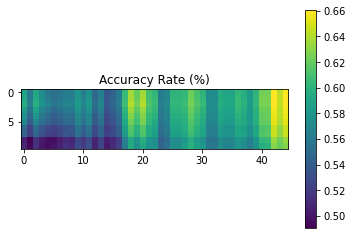

In [108]:
#Step 09. Plotting 
import matplotlib.pyplot as plt

plt.imshow(acc_array)
plt.colorbar()
plt.title("Accuracy Rate (%)")